# Linear regression
A simple linear regression model that predict a person's weight from its height

In [9]:
# imports
import pandas as pd
import numpy as np


In [10]:
# read dataset
filename = "datasets/500_Person_Gender_Height_Weight_Index"
df = pd.read_csv(f"{filename}.csv", usecols=[1,2], header=0, names=["height", "weight"])
print(df)


     height  weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[500 rows x 2 columns]


In [11]:
# useful functions
def split_train_test(df, p):
    """
    Takes a dataframe and the number of data in the train set.
    Returns a list of dataframes.
    """
    n = int(p*len(df))
    train = df.iloc[0:n, :]
    test = df.iloc[n:len(df), :]
    return train, test


In [12]:
# split dataset into train and test
train_df, test_df = split_train_test(df, 0.5)

print(train_df)
print(test_df)

# create array-like objects for train and test data
x_train = train_df["height"]
y_train = train_df["weight"]

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = test_df["height"]
y_test = test_df["weight"]

x_test = np.array(x_test)
y_test = np.array(y_test)


     height  weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
245     151     114
246     182      98
247     142     159
248     188      90
249     161      89

[250 rows x 2 columns]
     height  weight
250     153      70
251     140     143
252     169     141
253     162     159
254     183     147
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[250 rows x 2 columns]


## Train the model

In [13]:
# set initial values for learnable parameters
a = 1
b = 0

lr = 0.000005
epochs = 100

n = len(x_train)

for i in range(epochs):
    y = a*x_train + b
    error = y - y_train
    loss = np.sum(error**2)/n
    loss_a = 2*np.sum(error*x_train)/n
    loss_b = 2*np.sum(error)/n
    a = a - loss_a*lr
    b = b - loss_b*lr
    print(f"loss: {loss} \t({i+1}/{epochs})")
    

loss: 5392.616 	(1/100)
loss: 3219.748640885197 	(2/100)
loss: 2141.6909708451794 	(3/100)
loss: 1606.817848119935 	(4/100)
loss: 1341.4431189382292 	(5/100)
loss: 1209.778718007929 	(6/100)
loss: 1144.454051597086 	(7/100)
loss: 1112.0435245325875 	(8/100)
loss: 1095.9631889703307 	(9/100)
loss: 1087.9849991665822 	(10/100)
loss: 1084.0266499068412 	(11/100)
loss: 1082.0627251465962 	(12/100)
loss: 1081.0883244833014 	(13/100)
loss: 1080.6048714285498 	(14/100)
loss: 1080.3649996620934 	(15/100)
loss: 1080.2459795771115 	(16/100)
loss: 1080.1869194710655 	(17/100)
loss: 1080.1576082194026 	(18/100)
loss: 1080.143056718374 	(19/100)
loss: 1080.1358281964426 	(20/100)
loss: 1080.1322329352759 	(21/100)
loss: 1080.130440298917 	(22/100)
loss: 1080.129542026165 	(23/100)
loss: 1080.1290874876045 	(24/100)
loss: 1080.1288531056255 	(25/100)
loss: 1080.1287279532737 	(26/100)
loss: 1080.128656994677 	(27/100)
loss: 1080.1286129240514 	(28/100)
loss: 1080.1285821937654 	(29/100)
loss: 1080.1

In [14]:
print(f"a: {a}")
print(f"b: {b}")

a: 0.6180621000699592
b: -0.0012728011322712892


## Test the model

In [15]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


R2 Score: -0.10492199124828705


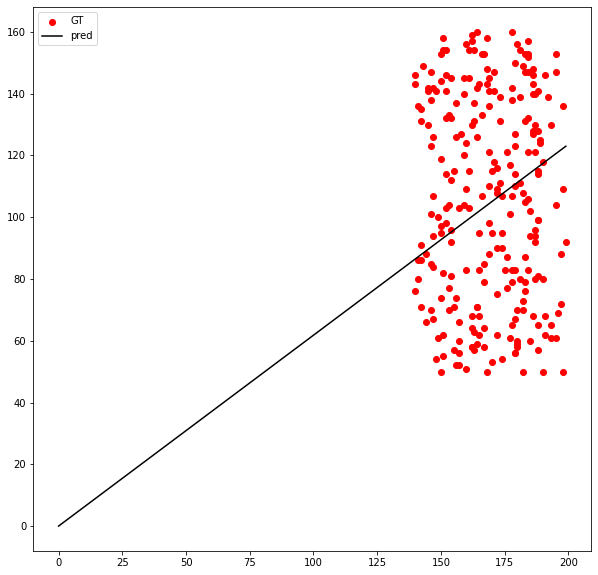

In [16]:
y_prediction = a*x_test + b
print(f"R2 Score: {r2_score(y_test, y_prediction)}")

y_plot = []
for i in range(200):
    y_plot.append(b + a * i)
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color='red', label='GT')
plt.plot(range(len(y_plot)), y_plot, color='black', label='pred')
plt.legend()
plt.show()
